**lets import our modules, as usual**

In [1]:
import numpy, pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import folium

**Lets read our previous file as a dataframe. Seems OK.**

In [2]:
df=pandas.read_csv("full_df.csv")
df.head()

,Unnamed: 0,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


**Lets make our "dataset"

In [3]:
dataset=df[["Latitude","Longitude"]].values

In [4]:
x=dataset[:,0]
y=dataset[:,1]

In [5]:
t_map=folium.Map([43.651070,-79.347015],zoom_start=10)
for i in range(len(x)):
    folium.Marker([x[i],y[i]]).add_to(t_map)
    
t_map

In [6]:
scores=[]
k=[2,3,4,5,6,7,8]
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(dataset)
    scores.append(kmeans.inertia_)

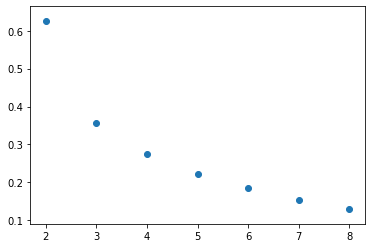

In [7]:
plt.scatter(k, scores)

In [8]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(dataset)
df["labels"]=kmeans.labels_
cc=kmeans.cluster_centers_

In [9]:
df.columns

Index(['Unnamed: 0', 'PostalCode', 'Borough', 'Neighbourhood', 'Latitude',
       'Longitude', 'labels'],
      dtype='object')

In [10]:
cc

array([[ 43.68059059, -79.52478493],
       [ 43.74254792, -79.41366641],
       [ 43.76342274, -79.25682511],
       [ 43.66807421, -79.37315645]])

t_map=folium.Map([43.651070,-79.347015],zoom_start=10)
color_dict={0:"#257F0C", 1:"#333FFF", 2:"#040404", 3:"#FF3333"}
colors=[color_dict[i] for i in df.labels]

for i in range(len(df.labels)):
    folium.Circle([x[i], y[i]], radius=10, color=colors[i]).add_to(t_map)
    
t_map